# BlackFraiday Dataset EDA, Feature Engineering & Modeling

# تحلیل اکتشافی،مهندسی ویژگی و مدل سازی دیتاست جمعه سیاه

#  بیان مسئله
#### یک شرکت خرده‌فروشی  می‌خواهد رفتار خرید مشتریان (به ویژه، مقدار خرید) را در برابر محصولات مختلف از دسته‌های مختلف درک کند.
#### آنها خلاصه خرید مشتریان مختلف را برای محصولات منتخب با حجم بالا از ماه گذشته را به اشتراک گذاشته اند.


#### _حالا آنها می خواهند مدلی برای پیش بینی میزان خرید مشتری در برابر محصولات مختلف بسازند که به آنها کمک می کند تا پیشنهاد شخصی برای مشتریان در برابر محصولات مختلف ایجاد کنند._

**در ابتدا  کتابخانه های مورد نیاز را وارد میکنیم:** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict
%matplotlib inline


### دیتاست را از لینک زیر دانلود کرده و وارد میکنیم

## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

#### مجموعه داده‌ها   شامل اطلاعات به شرح زیر می باشد:
1. شناسه مشتری ..........................................int64....................User_ID
2. شناسه محصول.......................................object...................Product_ID 
3. جنسیت ................................................object...................Gender 
4. سن .....................................................object...................Age 
5. شغل ............................................ int64....................Occupation 
6. نوع شهر .......................................object...................City_Category 
7. تعداد سال اقامت در شهر جاری............object....................Stay_In_Current_City_Years 
8. وضعیت تاهل....................................int64 ....................Marital_Status
9. محصولات دسته 1...... ......................float64...................Product_Category_1
10. محصولات دسته 2...... .....................float64...................Product_Category_2
11. محصولات دسته 3...... .....................float64...................Product_Category_3
12. خرید ( متغیر هدف ما) .................................float64...................Purchase  

##### داده های آموزشی و تست را  فراخوانی می کنیم

In [2]:
df_train = pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

In [3]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [5]:
df_train.shape  ,df_test.shape

((550068, 12), (233599, 11))

##### داده های آموزشی و تست را با هم ادغام می کنیم


اگه از مرج استفاده کنیم نمیشه، مرج برای ادغام ستونی هستنش 
ما میخاهیم ادغام سطری انجام بدیم، یعنی دیتاست تست بیاد زیر دیتاست آموزشی


In [6]:
# pd.merge(df_train[:-2] , df_test)

از append هم میشه استفاده کرد، ولی چون دیگه دستور appendتوسط خود پانداس توصیه نمیشه از concat استفاده میکنیم

پس از کد زیر استفاده میکنیم

In [7]:
df = pd.concat([df_train,df_test])

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### ببینیم به کدوم ستون یا ستونها  نیازی نداریم و می تونیم حذفش کنیم
#### با نگاه کردن به دیتافریم میفهمیم به ستون User_ID نیازی نداریم و میشه حذفش کرد

In [11]:
df = df.drop(["User_ID"], axis=1)
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


### حالا می خواهیم متغیرهایی که بصورت ذاتی categorical هستند رو پیدا کنیم و بعد بوسیله روشهای مهندسی ویژگی اونها رو به numerical تبدیل کنیم

In [12]:
df.dtypes[df.dtypes=="object"]

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

#### اول به مهندسی ویژگی جنیست می پردازیم
#### در ابتدا وضعیت جنسیت مشتری ها رو مشخص میکنیم که چه تعداد مرد و زن هستند، و اینکه درصد آنها چقدر است

In [13]:
df.groupby("Gender").size()


Gender
F    193636
M    590031
dtype: int64

تعداد 193،636 نفر از مشتریان زن و 590،031 نفر ار آنها مرد هستند

In [14]:
df.Gender.value_counts(normalize=True)

M    0.75291
F    0.24709
Name: Gender, dtype: float64

اگر درصد بندی کنیم، بیش از 75درصد مشتریان مرد و نزدیک25درصد آنها زن می باشد.

برای مدیریت داده های غیرعددی و تبدیل آنها به داده های عددی چند راهکار داریم:
1. استفاده از متغیر دامی بوسیله کتابخانه پانداس
2. استفاده از دستور map یا raplace با ترکیبت دیکشنری
3. استفاده از کتابخانه sklearn و توابع encoding و ....

In [15]:
# برطرف کردن مشکل ویژگی جنسیت
#df["Gender"] = pd.get_dummies(df["Gender"],drop_first=1)

In [15]:
df["Gender"] = df["Gender"].map({"F":0 , "M":1})

In [16]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


### مدیریت ویژگی سن
#### اول دسته بندی سن را مشخص می کنیم
#### اینجا هم سه گزینه برای مدیریت داریم که :
1. روش اول استفاده از متغیر دامی است که اینجا پیشنهاد نمیشه
2. روش دوم استفاده از دستور reaplace هستش که اینجا استفاده میکنیم
3. روش سوم استفاده از labelencode در کتابخانه sklearn هستش

In [17]:
df.groupby("Age").size()

Age
0-17      21334
18-25    141953
26-35    313015
36-45    156724
46-50     65278
51-55     54784
55+       30579
dtype: int64

In [18]:
#روش اول استفاده از دستور متغیر دامی که پیشنهاد نمیشه
# روش دوم استفاده از مپ کردن رو ستون سن
df["Age"] = df["Age"].replace({"0-17":1,
                          "18-25":2,
                          "26-35":3,
                          "36-45":4,
                          "46-50":5,
                          "51-55":6,
                          "55+":7})

In [19]:
df.groupby("Age").size()

Age
1     21334
2    141953
3    313015
4    156724
5     65278
6     54784
7     30579
dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df["Age"] = le.fit_transform(df["Age"])

## ویژگی بعدی که نیاز داره مهندسی بشه، دسته بندی شهر هستش
## برای این کار ما از متغیر دامی استفاده میکنیم

In [20]:
df.groupby("City_Category").size()

City_Category
A    210244
B    329739
C    243684
dtype: int64

In [21]:
df_city = pd.get_dummies(df["City_Category"],drop_first=True)

In [22]:
df = pd.concat([df,df_city],axis=1)

#### حالا که متغیر دامی تعریف کردیم  و به دیتافریم اصلی وصل شد، دیگه نیازی به خود ویژگی City_Category نداریم و لذا  حذفش می کنیم

In [23]:
df.drop("City_Category", axis=1, inplace=True)

In [24]:
df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


### در نهایت آخرین متغیری که باید مدیریت بشه و به نوع عددی تبدیل بشه Stay_In_Current_City_Years هستش
### یه نگاهی به نوع دسته بندیش می اندازیم

In [25]:
df.groupby("Stay_In_Current_City_Years").size()

Stay_In_Current_City_Years
0     105716
1     276425
2     145427
3     135428
4+    120671
dtype: int64

#### مشاهده میشه که تنها با یک تغییر این ویژگی نیز مدیریت بشه، کافیه +4 رو مدیریت کنیم 

In [26]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+","4")

In [27]:
df.groupby(["Stay_In_Current_City_Years"]).size()

Stay_In_Current_City_Years
0    105716
1    276425
2    145427
3    135428
4    120671
dtype: int64

## حالا همه ی ویژگی هامون بصورت عددی و numerical هستن  و میتونیم بریم سراغ بررسی مقادیر گمشده

In [28]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### همانطور که میبینیم به جز متغیر خرید که متغیر هدف ما هستش، دو متغیر دیگه دارای مقادیر خالی هستن
*******************
### بریم ببینیم این دو متغیر رو چطوری مدیریت کنیم خوبه. 
#### یه روش اینه که اول توزیع این دو ویژگی رو بررسی کنیم و بعدش بر اساس توزیع آنها، اقدام مناسب رو انجام بدیم

### مدیریت مقادیر خالی Product_Category_2
### اول ترسیم نمودار

<AxesSubplot: ylabel='Frequency'>

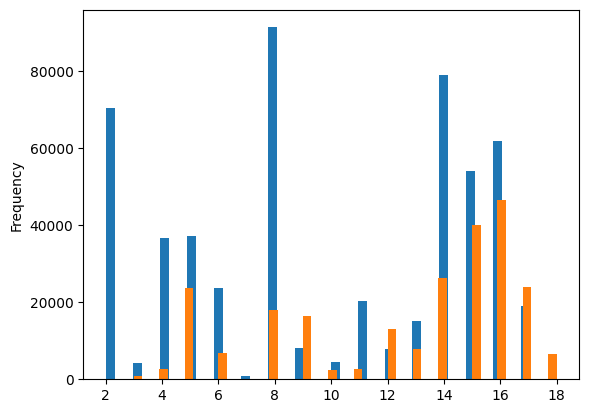

In [31]:
df["Product_Category_2"].plot(kind="hist",bins=50)
df["Product_Category_3"].plot(kind="hist",bins=50)

In [98]:
df["Product_Category_2"].mode()[0]

8.0

In [99]:
mode_pc2 = df["Product_Category_2"].mode()[0]

In [100]:
df["Product_Category_2"] = df["Product_Category_2"].replace(np.NaN , mode_pc2)

<AxesSubplot: ylabel='Frequency'>

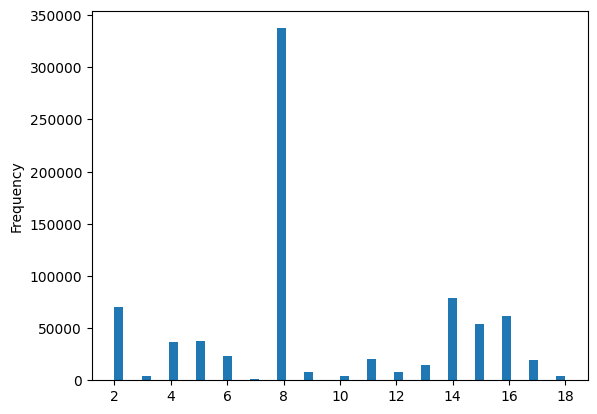

In [101]:
df["Product_Category_2"].plot(kind="hist",bins=50)

In [102]:
df["Product_Category_3"].mode()[0]

16.0

In [104]:
mode_pc3 = df["Product_Category_3"].mode()[0]

In [105]:
df["Product_Category_3"] = df["Product_Category_3"].replace(np.NaN , mode_pc3)

<AxesSubplot: ylabel='Frequency'>

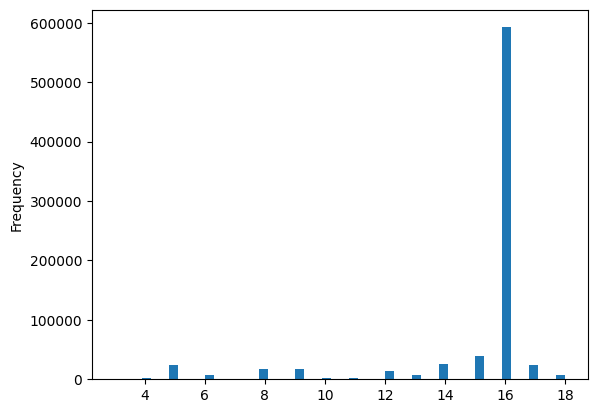

In [106]:
df["Product_Category_3"].plot(kind="hist",bins=50)

### درنهایت بررسی میکنیم ببینیم مقادیر خالی پر شدند یا خیر؟

In [107]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## حالا باید یه نگاه به تایپ کلی دیتاست میندازیم تا ببینیم تغییرات ما بخوبی اعمال شد یا خیر

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 83.4+ MB


#### مشاهده می شود که بعضی از ویژگی ها مانند: Stay_In_Current_City_Years، B و C تایپ غیرعددی دارند لذا باید اونها رو به عددی تبدیل کنیم هست

In [109]:
df["Stay_In_Current_City_Years"]= df["Stay_In_Current_City_Years"].astype("int")

In [110]:
df["B"]= df["B"].astype(int)
df["C"]= df["C"].astype(int)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 84.9+ MB


# مصورسازی

### نمودار سن در برابر خرید به تفکیک جنسیت

<AxesSubplot: xlabel='Age', ylabel='Purchase'>

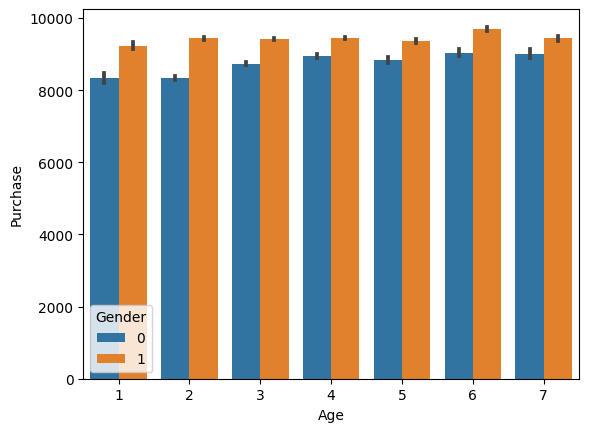

In [112]:
sns.barplot(x= "Age", y= "Purchase", hue="Gender", data=df)

### مشاهدات
1. همانگونه که میبنیم، خرید خوبی در هر یک از گروه های سنی صورت گرفته و بنوعی توازن بر قرار هستش
2. جنسیت مردها سقف خرید بیشتری نسبت به جنسیت خانم ها دارند

## نمودار شغل در برابر خرید

<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

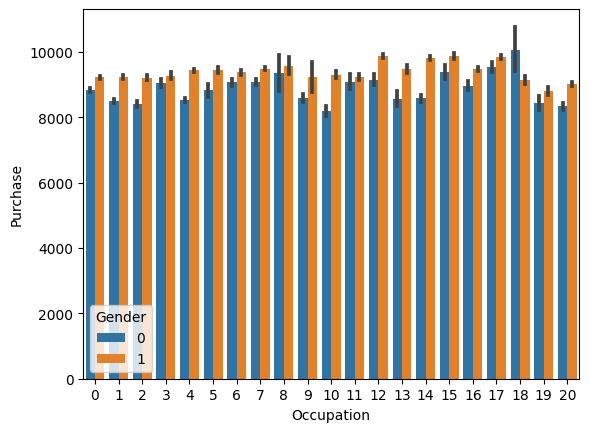

In [113]:
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df)

## نمودار سبد کالای 1 در برابر خرید

<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

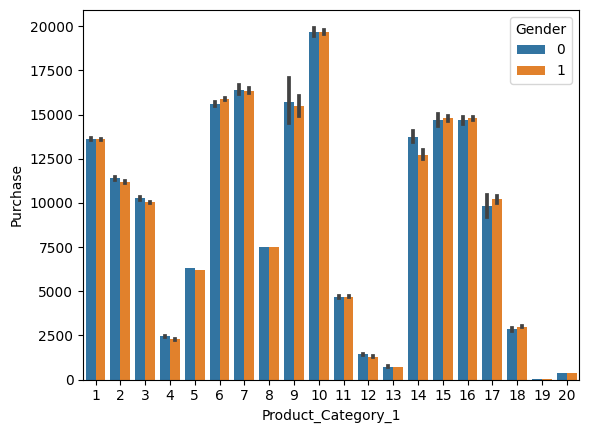

In [114]:
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=df)

## نمودار سبد کالای 2 در برابر خرید

<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

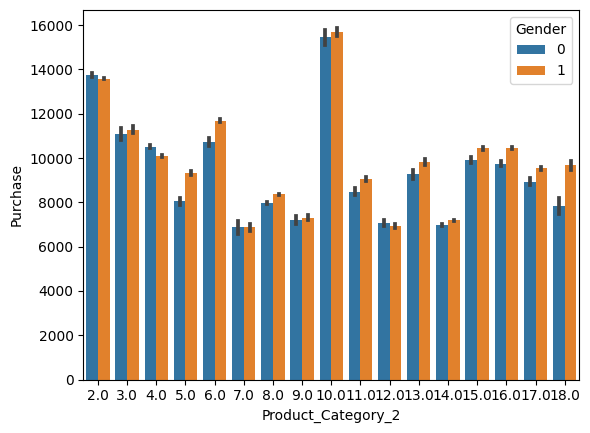

In [115]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=df)

## نمودار سبد کالای 3 در برابر خرید

<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

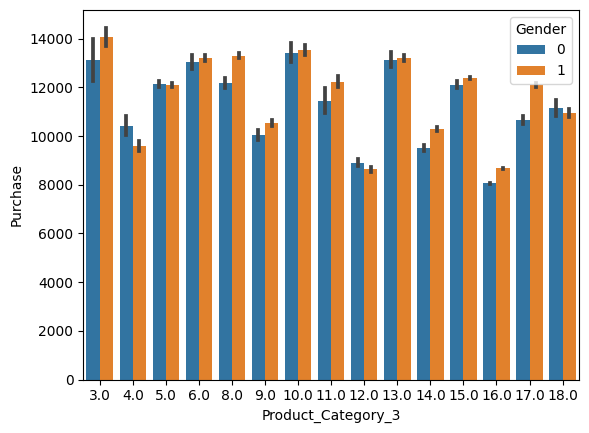

In [116]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=df)

# بدنبال این هستیم که ببینیم برای تخمین مبلغ خرید توسط هر مشتری، ایا رگرسیون خطی مناسب هستش؟
1. ### یه راه مصور سازی داده ها هستش.
2. ### یه راه دیگه بررسی همبستگی بین ویژگی ها با متغیر هدف هستش، که اگه مقدار اون بزرگتر از0.7 باشه میگیم میشه رابطه رو خطی در نظر گرفت و از رگرسیون خیط استفاده کرد 

In [117]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

## به 'Product_ID' نیازی نیست لذا  حذفش میکنیم

In [143]:
# df.loc[:,df.columns!="Product_ID"]

In [135]:
df.drop("Product_ID",axis=1, inplace=True)

In [144]:
corr =df.corr()
corr

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.000000,-0.004758,0.116505,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346,-0.005399,-0.000180
Age,-0.004758,1.000000,0.090882,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839,-0.016881,0.110302
Occupation,0.116505,0.090882,1.000000,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833,-0.011721,0.035255
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422,0.011011,0.011007
Marital_Status,-0.010945,0.310747,0.023563,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463,-0.002804,0.034377
Product_Category_1,-0.046208,0.060336,-0.008441,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703,-0.003863,-0.012870
Product_Category_2,-0.011851,0.041716,0.001501,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651,-0.003944,-0.000443
Product_Category_3,-0.006651,0.036721,-0.001576,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945,0.004291,-0.020687
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.019098,0.061012
B,-0.005399,-0.016881,-0.011721,0.011011,-0.002804,-0.003863,-0.003944,0.004291,-0.019098,1.000000,-0.572552


<AxesSubplot: >

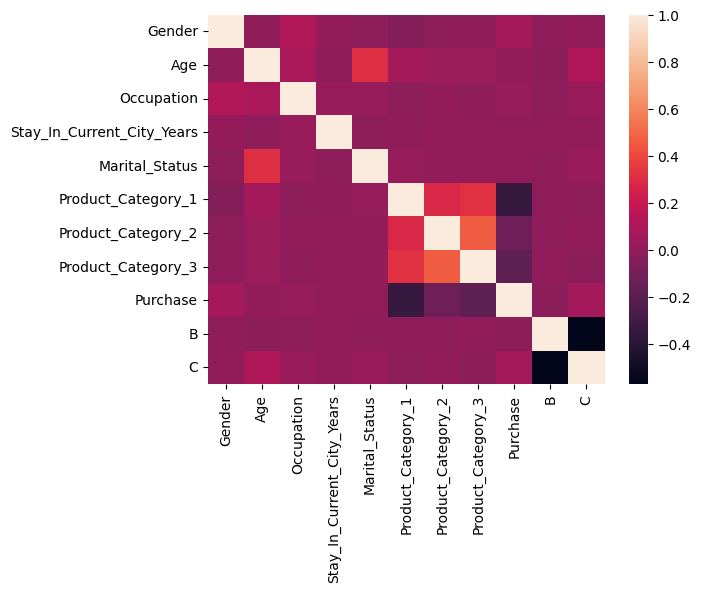

In [140]:
sns.heatmap(corr)

## مشاهدات
1. ### همانطور که مشاهده میشه، همبستگی قوی ای بین ویژگی ها با متغیر هدف وجود نداره و احتمالا رگرسیون خطی ساده جواب مناسبی نخواهد داد
2. ### به هر حال مدل رگرسیون خطی رو امتحان کرده و R2 آن را حساب میکنیم

### حالا نوبت اینه که بریم مدل مد نظرمون رو بسازیم


## اول باید مقادیر تست رو از مقادیر آموزشی جدا میکنیم، چون میخواهیم مدل رو بر اساس مقادیر آموزشی بسازیم

In [145]:
df[df["Purchase"].isnull()]

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,1


## به روش زیر دیتافریم تست رو جدا میکنیم
### میگیم مواردی که مقدار خرید خالی دارن مربوط به تست هستن، پس اونا رو بریز توی تست

In [146]:
df_test = df[df["Purchase"].isnull()]

### حالا میگیم اون داده هایی که مقدار خرید غیر صفر دارن مربطو به داده های آموزشی هستن، پس اونا رو بریز تو آمورشی


In [147]:
df_train = df[~df["Purchase"].isnull()]

In [148]:
df_train.head(1)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0


###  حالا باید داده های آموزشی رو برای پیش پردازش  به دو دسته X(مستقل) و y(وابسته) تقسیم کنیم

In [149]:
X = df_train.drop("Purchase", axis=1)

In [150]:
X.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0


In [151]:
X = X.values

In [152]:
y = df_train.loc[:,"Purchase"]

## تقسیم داده ها  به دو دسته

In [153]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [169]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((368545, 10), (181523, 10), (368545,), (181523,))

## حالا باید داده ها رو نرمال سازی کنیم


In [160]:
from sklearn.preprocessing import StandardScaler, normalize

In [157]:
#st = StandardScaler()
# X_train = st.fit_transform(X_train)

In [163]:
X_train = normalize(X_train)

In [164]:
X_train 

array([[ 0.22301153, -0.43063582,  0.47432411, ...,  0.14397279,
         0.45883573, -0.26249385],
       [-0.52079615,  0.11108402, -0.36860411, ..., -0.21573377,
        -0.25312664, -0.20013426],
       [ 0.17043417,  0.11134703,  0.27100038, ..., -0.65127683,
        -0.25372595,  0.44350957],
       ...,
       [ 0.23014153,  0.15035468, -0.06648762, ...,  0.14857581,
         0.47350538, -0.27088616],
       [ 0.17398956, -0.11115224,  0.37005911, ..., -0.66486299,
         0.35797535, -0.20479296],
       [ 0.18947935, -0.1210478 ,  0.19956228, ...,  0.12232494,
         0.38984486, -0.22302508]])

In [165]:
X_test  = normalize(X_test)

# مدل ها  رو می سازیم و بعد ارزیابی می کنیم

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [167]:
lr = LinearRegression()
model1 =lr.fit(X_train , y_train)
y_hat = model1.predict(X_test)
r2_score(y_test , y_hat)

-0.1571994628309792

# مشاهدات
# مقدار آر2 بشدت پایین و لذا مدل رگرسیون خطی اینجا اصلا کاربردی نداره

In [ ]:
#وارد کردن همه ی الگوریتم های داخل سایکیت لرن 

In [ ]:
from sklearn.utils import all_estimators

In [ ]:
# انتخاب یکی از الگوریتمهای داخل سایکیتلرن و نمایش آن
# {“classifier”, “regressor”, “cluster”, “transformer”}

In [ ]:
all_estimators("regressor")

In [ ]:
----

In [ ]:
from sklearn.tree._classes import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()
model2 = dt.fit(X_train,y_train)
y_hat2 =model2.predict(X_test)
r_squared = r2_score(y_test, y_hat2)
rmse = np.sqrt(mean_squared_error(y_test, y_hat2))
print("R2: ",r_squared ,"\n","RMSE: ",rmse)

In [ ]:
from sklearn.svm import SVR

In [ ]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
sv = SVR(kernel="linear")
model3 = sv.fit(X_train,y_train)
y_hat3 =model3.predict(X_test)
r_squared3 = r2_score(y_test, y_hat3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_hat3))
print("R2: ",r_squared3 ,"\n","RMSE: ",rmse3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kn=KNeighborsRegressor(n_neighbors=7)
model4 = kn.fit(X_train,y_train)
y_hat4 =model4.predict(X_test)
r_squared4 = r2_score(y_test, y_hat4)
rmse4 = np.sqrt(mean_squared_error(y_test, y_hat4))
print("R2: ",r_squared4 ,"\n","RMSE: ",rmse4)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
model5 = rf.fit(X_train,y_train)
y_hat5 =model5.predict(X_test)
r_squared5 = r2_score(y_test, y_hat5)
rmse5 = np.sqrt(mean_squared_error(y_test, y_hat5))
print("R2: ",r_squared5 ,"\n","RMSE: ",rmse5)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV

تنظیم پارامترهای مدل

In [ ]:
parameters = {
    'loss': ['squared_error','huber'],
    'learning_rate': [  1],
    'n_estimators': [ 200]
}

In [ ]:
grid_search = GridSearchCV(gbr, parameters, cv=3, verbose=3)
grid_search.fit(X_train,y_train)

In [ ]:
print(grid_search.best_params_)

حالا که بهترین پارامترها رو بدست آوردیدم مدل اصلی رو میسازیم

In [ ]:
gbr = GradientBoostingRegressor(loss='squared_error', learning_rate= 1, n_estimators=200,)
model6 = gbr.fit(X_train,y_train)
y_hat6 =model6.predict(X_test)
r_squared6 = r2_score(y_test, y_hat6)
rmse6 = np.sqrt(mean_squared_error(y_test, y_hat6))
print("R2: ",r_squared6 ,"\n","RMSE: ",rmse6)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()
model7 = ada.fit(X_train,y_train)
y_hat7 =model7.predict(X_test)
r_squared7 = r2_score(y_test, y_hat7)
rmse7 = np.sqrt(mean_squared_error(y_test, y_hat7))
print("R2: ",r_squared7 ,"\n","RMSE: ",rmse7)

In [171]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
parameters = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'learning_rate': [0.3, 0.5, 1],
    'n_estimators': [10, 15, 20, 25]
}
grid_search_xgb = GridSearchCV(xgb, parameters, verbose=3 ,cv=3)
grid_search_xgb.fit(X_train,y_train)

In [ ]:
print(grid_search_xgb.best_params_)

حالا مقادیر بهترین پارامتر را درون مدل قرار میدهیم تا ببینیم چه جوابی نسبت به حالت تصادفی بدست میاریم

In [ ]:
xgb = XGBRegressor(booster= 'gbtree', learning_rate= 0.5, n_estimators= 25)
model8 = xgb.fit(X_train,y_train)
y_hat8 =model8.predict(X_test)
r_squared8 = r2_score(y_test, y_hat8)
rmse8 = np.sqrt(mean_squared_error(y_test, y_hat8))
print("R2: ",r_squared8 ,"\n","RMSE: ",rmse8)

حالتی که نرخ یادگیری بصورت پیش فرض 0.3 هستش

In [172]:
xgb = XGBRegressor(booster= 'gbtree', learning_rate= 0.3, n_estimators= 200)
model9 = xgb.fit(X_train,y_train)
y_hat9 =model9.predict(X_test)
r_squared9 = r2_score(y_test, y_hat9)
rmse9 = np.sqrt(mean_squared_error(y_test, y_hat9))
print("R2: ",r_squared9 ,"\n","RMSE: ",rmse9)

R2:  0.6737414771218839 
 RMSE:  2868.4581025130165
